## Importar librerías

In [1]:
from segysak.segy import segy_loader
import pathlib
import platform
from IPython.display import display
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import os

## Explore the segy file

Check that segy file exits

In [2]:
# specify the example file and check we have the example data

segy_file = pathlib.Path("/home/ivan/data/NISCOTA/Niscota_4B.sgy")
print("SEG-Y exists:", segy_file.exists())

SEG-Y exists: True


Get the text header information

In [3]:
from segysak.segy import segy_header_scan, segy_header_scrape, get_segy_texthead
# examine the text header
get_segy_texthead(segy_file)

Text HeaderC 1 CLIENT                        COMPANY                       CREW NO         
C 2 LINE            AREA                        MAP ID                          
C 3 REEL NO           DAY-START OF REEL     YEAR      OBSERVER                  
C 4 INSTRUMENT: MFG            MODEL            SERIAL NO                       
C 5 DATA TRACES/RECORD        AUXILIARY TRACES/RECORD         CDP FOLD          
C 6 SAMPLE INTERNAL         SAMPLES/TRACE       BITS/IN      BYTES/SAMPLE       
C 7 RECORDING FORMAT        FORMAT THIS REEL        MEASUREMENT SYSTEM          
C 8 SAMPLE CODE: FLOATING PT     FIXED PT     FIXED PT-GAIN     CORRELATED      
C 9 GAIN  TYPE: FIXED     BINARY     FLOATING POINT     OTHER                   
C10 FILTERS: ALIAS     HZ  NOTCH     HZ  BAND    -     HZ  SLOPE    -    DB/OCT 
C11 SOURCE: TYPE            NUMBER/POINT        POINT INTERVAL                  
C12     PATTERN:                           LENGTH        WIDTH                  
C13 SWEEP: START     HZ  END     HZ  LENGTH      MS  CHANNEL NO     TYPE        
C14 TAPER: START LENGTH       MS  END LENGTH       MS  TYPE                     
C15 SPREAD: OFFSET        MAX DISTANCE        GROUP INTERVAL                    
C16 GEOPHONES: PER GROUP     SPACING     FREQUENCY     MFG          MODEL       
C17     PATTERN:                           LENGTH        WIDTH                  
C18 TRACES SORTED BY: RECORD     CDP     OTHER                                  
C19 AMPLITUDE RECOVEY: NONE      SPHERICAL DIV       AGC    OTHER               
C20 MAP PROJECTION                      ZONE ID       COORDINATE UNITS          
C21 PROCESSING:                                                                 
C22 PROCESSING:                                                                 
C23                                                                             
C24                                                                             
C25                                                                             
C26                                                                             
C27                                                                             
C28                                                                             
C29                                                                             
C30                                                                             
C31                                                                             
C32                                                                             
C33                                                                             
C34                                                                             
C35                                                                             
C36                                                                             
C37                                                                             
C38                                                                             
C39 SEG Y REV1                                                                  
C40 END EBCDIC

## Read the trace headers 
Trace headers are read as DataFrame

In [5]:
filename="header.pkl"
if os.path.isfile(filename):
    print(filename+" exists.")
    trace_headers =  pd.read_pickle(filename)
else: 
    trace_headers = segy_header_scrape(segy_file)
trace_headers

header.pkl exists.


,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,TraceIdentifier,ScalarTraceHeader,SourceType,SourceEnergyDirectionMantissa,SourceEnergyDirectionExponent,SourceMeasurementMantissa,SourceMeasurementExponent,SourceMeasurementUnit,UnassignedInt1,UnassignedInt2
0,1,1,9,1,1,23,0,12,0,1,...,0,1,0,0,0,0,0,0,0,0
1,2,2,9,2,1,24,0,12,0,1,...,0,2,0,0,0,0,0,0,0,0
2,3,3,9,3,1,25,0,12,0,1,...,0,3,0,0,0,0,0,0,0,0
3,4,4,9,4,1,26,0,12,0,1,...,0,4,0,0,0,0,0,0,0,0
4,5,5,9,5,1,27,0,12,0,1,...,0,5,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3566873,10252258,3566874,3437,1204,3645,216988,0,12,0,1,...,0,7968,0,0,0,0,0,0,0,0
3566874,10252259,3566875,3437,1205,3645,216989,0,12,0,1,...,0,7969,0,0,0,0,0,0,0,0
3566875,10252260,3566876,3437,1206,3645,216990,0,12,0,1,...,0,7970,0,0,0,0,0,0,0,0
3566876,10252261,3566877,3437,1207,3645,216991,0,12,0,1,...,0,7971,0,0,0,0,0,0,0,0


Print the column names of the trace headers

In [6]:
for col in trace_headers.columns:
    print(col)

TRACE_SEQUENCE_LINE
TRACE_SEQUENCE_FILE
FieldRecord
TraceNumber
EnergySourcePoint
CDP
CDP_TRACE
TraceIdentificationCode
NSummedTraces
NStackedTraces
DataUse
offset
ReceiverGroupElevation
SourceSurfaceElevation
SourceDepth
ReceiverDatumElevation
SourceDatumElevation
SourceWaterDepth
GroupWaterDepth
ElevationScalar
SourceGroupScalar
SourceX
SourceY
GroupX
GroupY
CoordinateUnits
WeatheringVelocity
SubWeatheringVelocity
SourceUpholeTime
GroupUpholeTime
SourceStaticCorrection
GroupStaticCorrection
TotalStaticApplied
LagTimeA
LagTimeB
DelayRecordingTime
MuteTimeStart
MuteTimeEND
TRACE_SAMPLE_COUNT
TRACE_SAMPLE_INTERVAL
GainType
InstrumentGainConstant
InstrumentInitialGain
Correlated
SweepFrequencyStart
SweepFrequencyEnd
SweepLength
SweepType
SweepTraceTaperLengthStart
SweepTraceTaperLengthEnd
TaperType
AliasFilterFrequency
AliasFilterSlope
NotchFilterFrequency
NotchFilterSlope
LowCutFrequency
HighCutFrequency
LowCutSlope
HighCutSlope
YearDataRecorded
DayOfYear
HourOfDay
MinuteOfHour
SecondOf

In [7]:
trace_headers[['INLINE_3D','CROSSLINE_3D']]

,INLINE_3D,CROSSLINE_3D
0,1,23
1,1,24
2,1,25
3,1,26
4,1,27
...,...,...
3566873,350,608
3566874,350,609
3566875,350,610
3566876,350,611


Select some columns from the trace headers.

In [8]:
sou_rec_pos=trace_headers[['EnergySourcePoint','SourceX','SourceY','GroupX','GroupY','ReceiverGroupElevation','SourceSurfaceElevation','SourceDepth','INLINE_3D','CROSSLINE_3D']].drop_duplicates()
sou_rec_pos

,EnergySourcePoint,SourceX,SourceY,GroupX,GroupY,ReceiverGroupElevation,SourceSurfaceElevation,SourceDepth,INLINE_3D,CROSSLINE_3D
0,1,1182365,1105911,1181982,1106233,1121,1137,0,1,23
1,1,1182365,1105911,1182018,1106201,1099,1137,0,1,24
2,1,1182365,1105911,1182053,1106169,1090,1137,0,1,25
3,1,1182365,1105911,1182089,1106137,1082,1137,0,1,26
4,1,1182365,1105911,1182124,1106105,1073,1137,0,1,27
...,...,...,...,...,...,...,...,...,...,...
3566873,3645,1201128,1105871,1200942,1106056,323,319,0,350,608
3566874,3645,1201128,1105871,1200978,1106024,321,319,0,350,609
3566875,3645,1201128,1105871,1201013,1105992,321,319,0,350,610
3566876,3645,1201128,1105871,1201049,1105959,320,319,0,350,611


## Plot the source positions

Number os shots:  3645


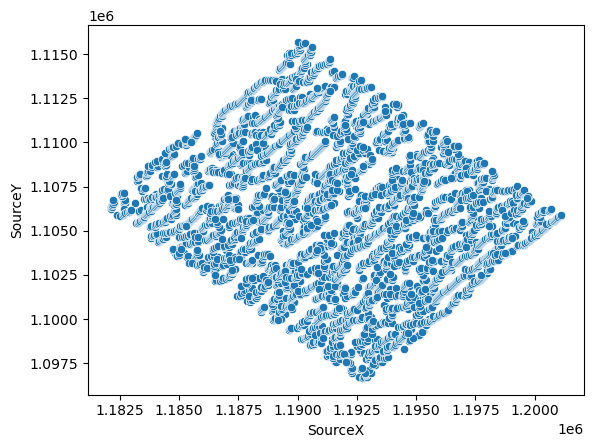

In [41]:
import seaborn as sns
sou_pos=sou_rec_pos.drop_duplicates(subset=['EnergySourcePoint'])
print('Number os shots: ',len(sou_pos))
sns.scatterplot(data=sou_pos, x="SourceX", y="SourceY")
plt.show()

## Plot receiver positions

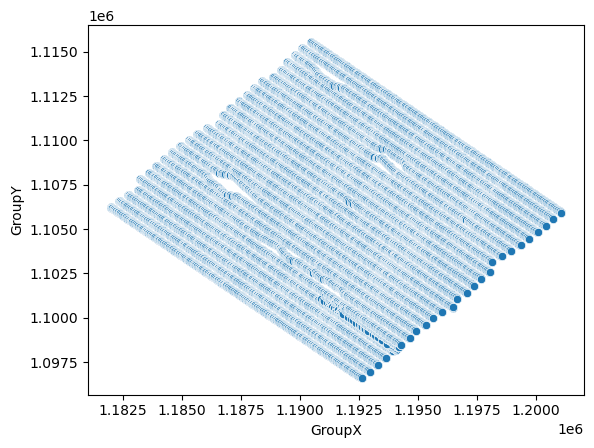

In [10]:
rec_pos=sou_rec_pos.drop_duplicates(subset=['GroupX','GroupY'])
sns.scatterplot(data=sou_rec_pos, x="GroupX", y="GroupY")
plt.show()

## Plot receiver positions for one selected source

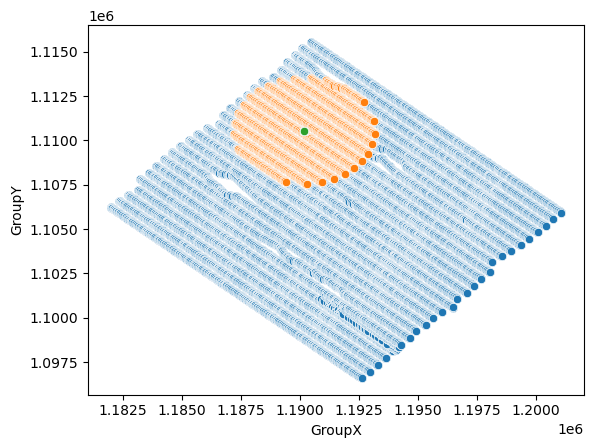

In [28]:
source=990
#shot_point = sou_rec_pos[(sou_rec_pos['EnergySourcePoint'] == source) & (sou_rec_pos['INLINE_3D'] == 257)]
shot_point = sou_rec_pos[(sou_rec_pos['EnergySourcePoint'] == source)]
sns.scatterplot(data=sou_rec_pos, x="GroupX", y="GroupY")
sns.scatterplot(data=shot_point, x="GroupX", y="GroupY")
sns.scatterplot(data=shot_point, x="SourceX", y="SourceY")
plt.show()

In [29]:
shot_point

,EnergySourcePoint,SourceX,SourceY,GroupX,GroupY,ReceiverGroupElevation,SourceSurfaceElevation,SourceDepth,INLINE_3D,CROSSLINE_3D
859868,990,1190193,1110531,1187392,1109491,942,1785,0,205,117
859869,990,1190193,1110531,1187428,1109459,949,1785,0,205,118
859870,990,1190193,1110531,1187463,1109427,956,1785,0,205,119
859871,990,1190193,1110531,1187497,1109393,957,1785,0,205,120
859872,990,1190193,1110531,1187535,1109362,963,1785,0,205,121
...,...,...,...,...,...,...,...,...,...,...
861048,990,1190193,1110531,1192560,1112289,1167,1785,0,282,158
861049,990,1190193,1110531,1192594,1112256,1185,1785,0,282,159
861050,990,1190193,1110531,1192631,1112224,1214,1785,0,282,160
861051,990,1190193,1110531,1192666,1112192,1231,1785,0,282,161


In [30]:
aa=shot_point[['INLINE_3D']].drop_duplicates()
aa

,INLINE_3D
859868,205
859926,212
860014,219
860119,226
860235,233
860357,240
860482,247
860606,254
860726,261
860837,268


## Read traces
Read the traces for one specific source as **seismic_data** DataSet.

In [31]:
seismic_data = segy_loader(
    segy_file,
    head_df=trace_headers[trace_headers['EnergySourcePoint'] == source].copy()
)
seismic_data

                        byte_loc   count          mean           std  \
TRACE_SEQUENCE_LINE            1  1185.0  2.340959e+06    664.498385   
TRACE_SEQUENCE_FILE            5  1185.0  8.604610e+05    342.224342   
TraceNumber                   13  1185.0  1.459934e+03    664.498385   
CDP                           21  1185.0  1.498209e+05  13112.156418   
offset                        37  1185.0  2.011986e+03    710.154942   
ReceiverGroupElevation        41  1185.0  1.285192e+03    240.234671   
GroupX                        81  1185.0  1.190215e+06   1501.454253   
GroupY                        85  1185.0  1.110568e+06   1516.449233   
MuteTimeStart                111  1185.0  6.751055e-03      0.116051   
MuteTimeEND                  113  1185.0  6.751055e-03      0.116051   
CDP_X                        181  1185.0  1.190195e+06    750.924314   
CDP_Y                        185  1185.0  1.110544e+06    758.317585   
INLINE_3D                    189  1185.0  2.424118e+02     21.14

/tmp/ipykernel_19196/1070633599.py:1: DeprecationWarning: segy_loader will be removed in v0.6, please use the Xarray engine ds = xr.open_dataset(segy_file) method instead.
  seismic_data = segy_loader(


Converting SEGY:   0%|          | 0.00/3.57M [00:00<?, ? traces/s]

<xarray.Dataset>
Dimensions:  (cdp: 1185, twt: 4001)
Coordinates:
  * cdp      (cdp) int64 859868 859869 859870 859871 ... 861050 861051 861052
  * twt      (twt) float64 0.0 2.0 4.0 6.0 ... 7.996e+03 7.998e+03 8e+03
Data variables:
    data     (cdp, twt) float32 -19.02 -6.019 15.98 ... -18.25 -24.25 -30.25
Attributes: (12/17)
    ns:                  None
    sample_rate:         2.0
    text:                C 1 CLIENT                        COMPANY           ...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    percentiles:         [-512.1995407978256, -466.60436769286116, -113.71213...
    coord_scalar:        1.0
    coord_scaled:        None
    dimensions:          None
    vert_dimension:      None
    vert_domain:         None

Change time coordinate

In [32]:
seismic_data["time"] = ("time",  np.array(seismic_data.twt*1e-3, dtype='f'))
seismic_data["data"] = (("cdp", "time"), np.array(seismic_data.data))
seismic_data

<xarray.Dataset>
Dimensions:  (cdp: 1185, twt: 4001, time: 4001)
Coordinates:
  * cdp      (cdp) int64 859868 859869 859870 859871 ... 861050 861051 861052
  * twt      (twt) float64 0.0 2.0 4.0 6.0 ... 7.996e+03 7.998e+03 8e+03
  * time     (time) float32 0.0 0.002 0.004 0.006 ... 7.994 7.996 7.998 8.0
Data variables:
    data     (cdp, time) float32 -19.02 -6.019 15.98 ... -18.25 -24.25 -30.25
Attributes: (12/17)
    ns:                  None
    sample_rate:         2.0
    text:                C 1 CLIENT                        COMPANY           ...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    percentiles:         [-512.1995407978256, -466.60436769286116, -113.71213...
    coord_scalar:        1.0
    coord_scaled:        None
    dimensions:          None
    vert_dimension:      None
    vert_domain:         None

## Plot one trace

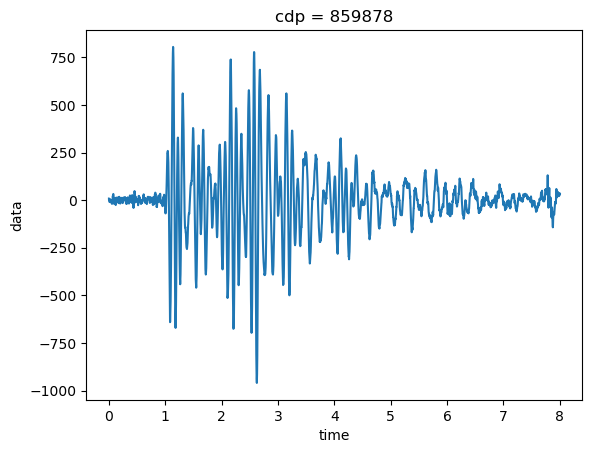

In [33]:
data=seismic_data.data  #DataArray from DataSet0
trace = data.isel(cdp=10) #Select trace for one cdp
trace.plot()
plt.show()

## Save selected data and headers
save **seismic_data** DataSet as netCDF file

In [34]:
seismic_data

<xarray.Dataset>
Dimensions:  (cdp: 1185, twt: 4001, time: 4001)
Coordinates:
  * cdp      (cdp) int64 859868 859869 859870 859871 ... 861050 861051 861052
  * twt      (twt) float64 0.0 2.0 4.0 6.0 ... 7.996e+03 7.998e+03 8e+03
  * time     (time) float32 0.0 0.002 0.004 0.006 ... 7.994 7.996 7.998 8.0
Data variables:
    data     (cdp, time) float32 -19.02 -6.019 15.98 ... -18.25 -24.25 -30.25
Attributes: (12/17)
    ns:                  None
    sample_rate:         2.0
    text:                C 1 CLIENT                        COMPANY           ...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    percentiles:         [-512.1995407978256, -466.60436769286116, -113.71213...
    coord_scalar:        1.0
    coord_scaled:        None
    dimensions:          None
    vert_dimension:      None
    vert_domain:         None

In [35]:
# Remove problematic attributes
for attr in ['ns', 'epsg', 'srd','coord_scaled','dimensions','vert_dimension','vert_domain','datatype','d3_domain','corner_points','corner_points_xy','corner_points','coord_scalar'] :
    if attr in seismic_data.attrs:
        del seismic_data.attrs[attr]

In [38]:
# Now save the dataset
if 0:
      filedata=f"seismic_data_source_{source}.nc"
      if os.path.isfile(filedata):
            print(filedata+" exists.")
      else :
            seismic_data.to_netcdf(filedata)

save **sou_rec_pos** DataFrame as PKL file

In [37]:
# Save header info as .pkl
if 0:
      fileheader="sou_rec_pos.pkl"
      if os.path.isfile(fileheader):
            print(fileheader+" exists.")
      else: 
            sou_rec_pos.to_pickle(fileheader)

            # Save header info as .pkl
      fileheader="header.pkl"
      if os.path.isfile(fileheader):
            print(fileheader+" exists.")
      else: 
            trace_headers.to_pickle(fileheader)